In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('Zoo.csv')

In [3]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

[]

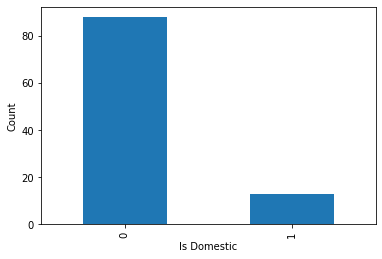

In [7]:
plt.figure(figsize=(6,4))
data.domestic.value_counts().plot(kind="bar")
plt.xlabel('Is Domestic')
plt.ylabel("Count")
plt.plot()

[]

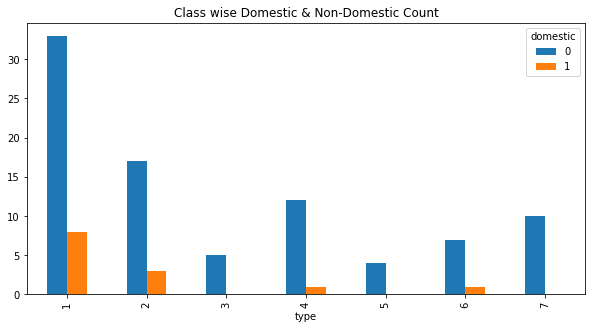

In [8]:
# Species wise domestic and non-domestic animals
pd.crosstab(data.type, data.domestic).plot(kind="bar", figsize=(10, 5), title="Class wise Domestic & Non-Domestic Count")
plt.plot()


In [9]:
data.aquatic.value_counts()

0    65
1    36
Name: aquatic, dtype: int64

Text(0.5, 1.0, 'Features for the Animals')

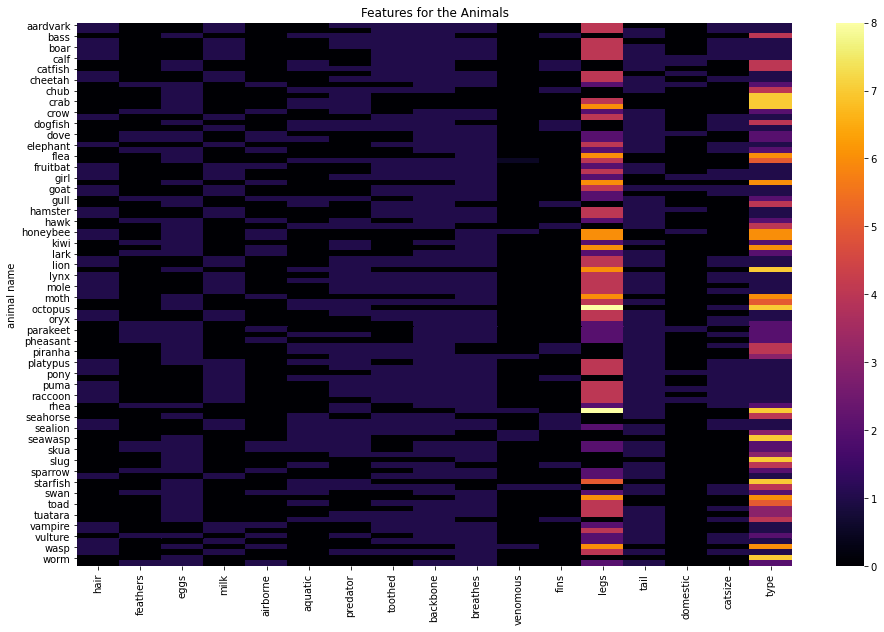

In [10]:
data_temp = data
data_temp = data_temp.groupby(by='animal name').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(data_temp, cmap="inferno")
ax = plt.gca()
ax.set_title("Features for the Animals")

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

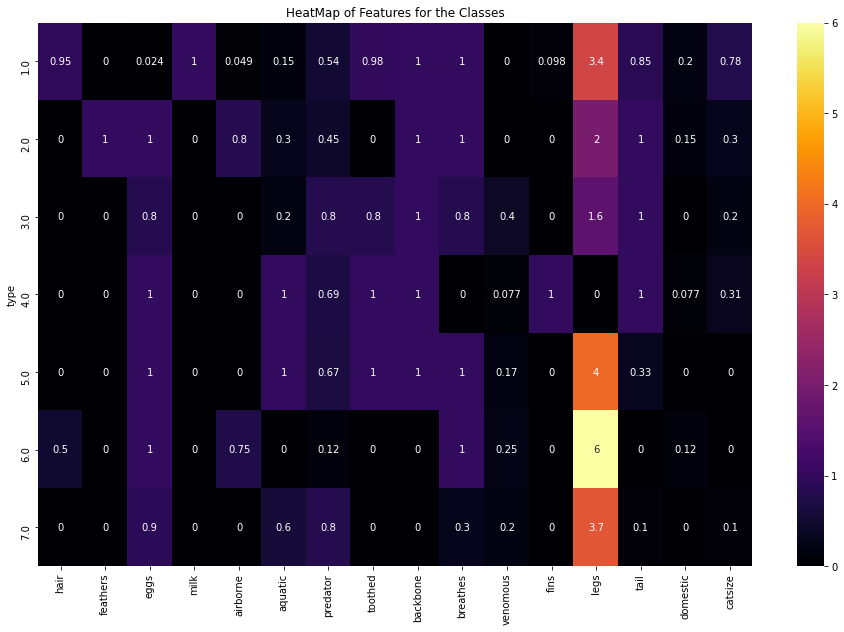

In [11]:
data_temp = data_temp.groupby(by='type').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(data_temp, annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

In [12]:
data1 = data.drop('animal name', axis = 1)
data1.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [13]:
X = data1.drop('type', axis = 1)
y = data['type']

In [14]:
# Split X and y into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [15]:
# Fit k-nearest neighbors classifier with training sets for n = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# Run prediction
y_pred = knn.predict(X_test)

In [17]:
y_pred

array([5, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 6, 2, 4, 2, 4,
       1, 2, 1, 1], dtype=int64)

In [18]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
pred_df

,Actual,Predicted
26,5,5
86,4,4
2,4,4
55,1,1
75,1,1
94,1,1
16,2,2
73,4,4
54,1,1
96,1,1


In [19]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.96        26
   macro avg       0.83      0.86      0.84        26
weighted avg       0.93      0.96      0.94        26



C:\Users\nirma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nirma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nirma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


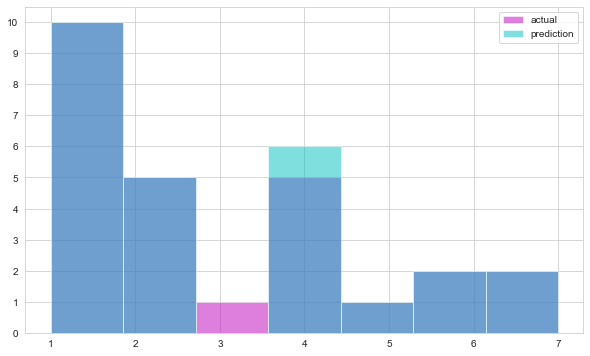

In [21]:
sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (10, 6) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

In [23]:
# Get score for different values of n
k_list = np.arange(1, 50, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    score = cross_val_score(knn,X_train, y_train,cv=3)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

print("Mean Scores:")
print(mean_scores)
print("Error Rate:")
print(error_rate)


Mean Scores:
[0.9199999999999999, 0.88, 0.8133333333333334, 0.7733333333333334, 0.7600000000000001, 0.7466666666666667, 0.7200000000000001, 0.64, 0.5866666666666668, 0.5733333333333334, 0.5733333333333334, 0.5733333333333334, 0.56, 0.5333333333333333, 0.52, 0.48, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334]
Error Rate:
[0.0, 0.0, 0.038461538461538464, 0.07692307692307693, 0.11538461538461539, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.23076923076923078, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.46153846153846156, 0.46153846153846156, 0.5, 0.5, 0.6153846153846154]


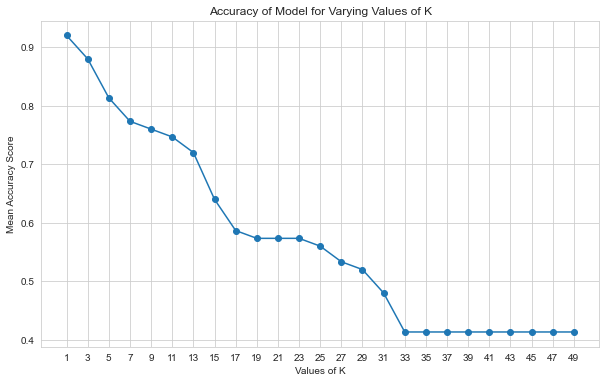

In [24]:
# Plot n values and average accuracy scores
plt.plot(k_list,mean_scores, marker='o')

# Added titles and adjust dimensions
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12,12) 

plt.show()

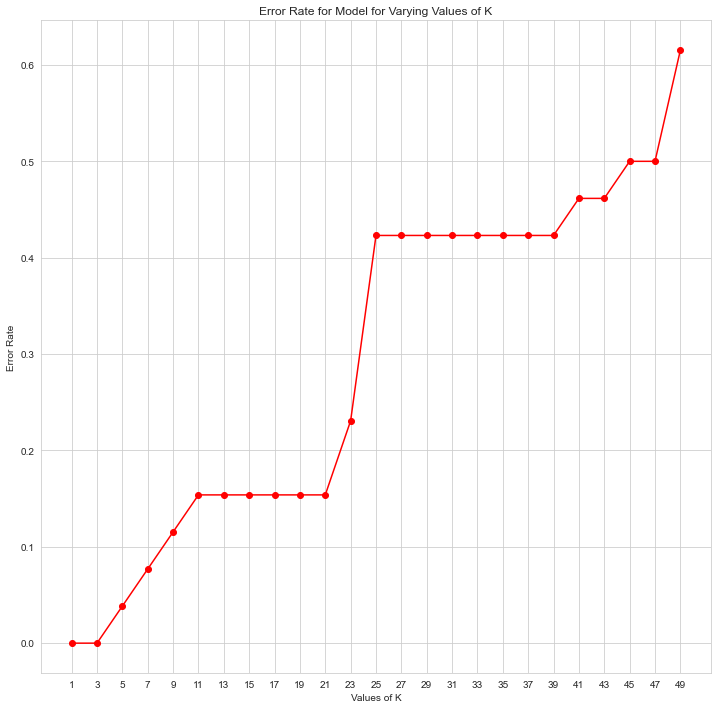

In [25]:
# Plot n values and average accuracy scores
plt.plot(k_list,error_rate, color='r', marker = 'o')

# Added titles and adjust dimensions
plt.title('Error Rate for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.rcParams['figure.figsize'] = (12, 6) 

plt.show()

In [26]:
data1.columns


Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [27]:
data1['has_legs'] = np.where(data1['legs']>0,1,0)
data1 = data1[['hair','feathers','eggs','milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes',
               'venomous','fins','legs','has_legs','tail','domestic','catsize','type']]
data1.head()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1,1


In [28]:
# Select columns to add to X and y sets
features = list(data1.columns.values)
features.remove('legs')
features.remove('type')
X2 = data1[features]
y2 = data1['type']

In [29]:
# Split X and y into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state = 0)
# Fit k-nearest neighbors classifier with training sets for n = 5
knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(X2_train, y2_train)

KNeighborsClassifier()

In [30]:
y2_pred = knn2.predict(X2_test)
print(confusion_matrix(y2_test,y2_pred))

[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


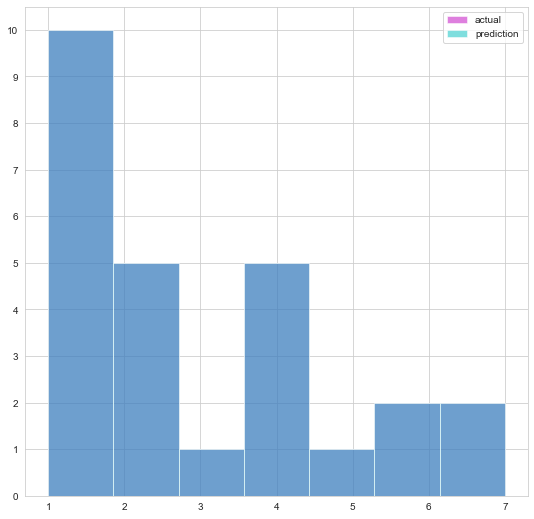

In [31]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y2_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(y2_pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')

plt.show()

In [32]:
# Get score for different values of n
k_list = np.arange(1, 50, 2)
mean_scores2 = []
accuracy_list2 = []
error_rate2 = []

for i in k_list:
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X2_train,y2_train)
    pred_i = knn2.predict(X2_test)
    score = cross_val_score(knn2,X2_train, y2_train,cv=3)
    mean_scores2.append(np.mean(score))
    error_rate2.append(np.mean(pred_i != y2_test))

print("Mean Scores:")
print(mean_scores)
print("Error Rate:")
print(error_rate)

Mean Scores:
[0.9199999999999999, 0.88, 0.8133333333333334, 0.7733333333333334, 0.7600000000000001, 0.7466666666666667, 0.7200000000000001, 0.64, 0.5866666666666668, 0.5733333333333334, 0.5733333333333334, 0.5733333333333334, 0.56, 0.5333333333333333, 0.52, 0.48, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334, 0.4133333333333334]
Error Rate:
[0.0, 0.0, 0.038461538461538464, 0.07692307692307693, 0.11538461538461539, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.23076923076923078, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.4230769230769231, 0.46153846153846156, 0.46153846153846156, 0.5, 0.5, 0.6153846153846154]
